In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder

In [21]:
df = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\ML\Breast_Cancer_Classification\Dataset\breast-cancer.csv')

In [22]:
df.shape

(569, 32)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [26]:
df.drop('id', axis=1, inplace=True)
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)

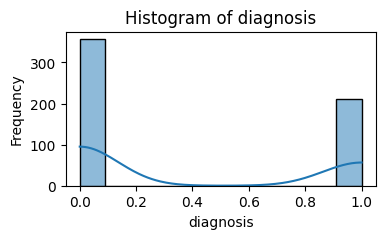

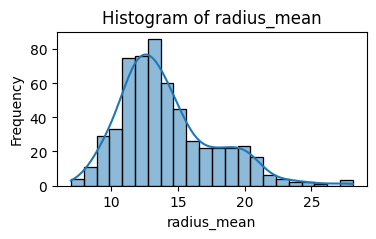

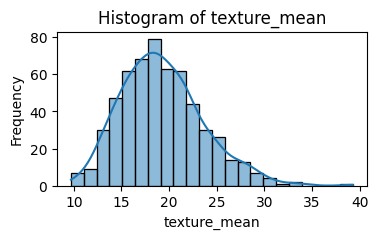

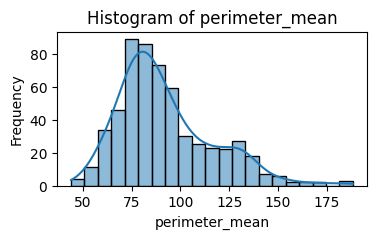

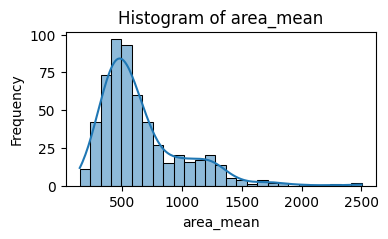

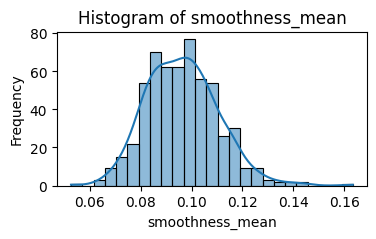

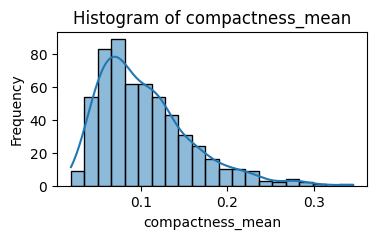

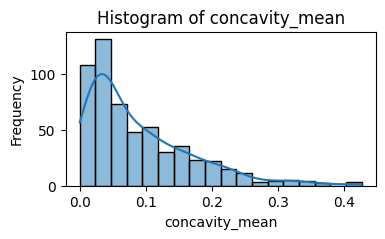

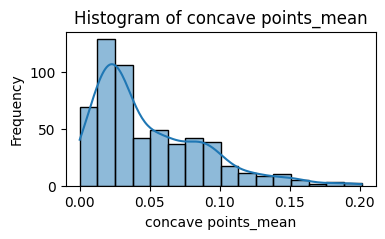

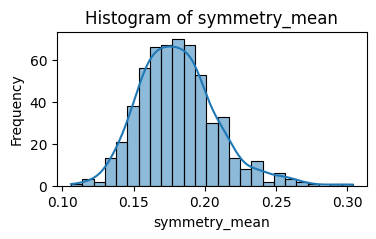

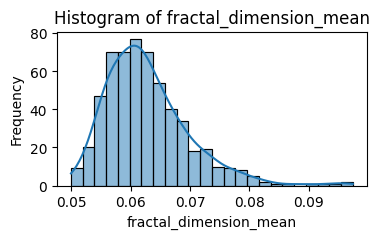

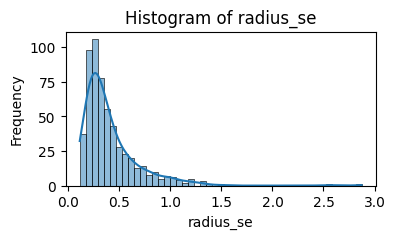

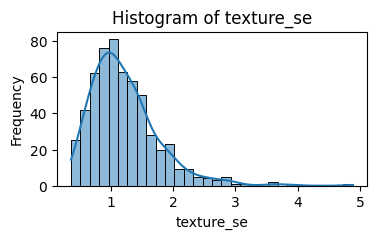

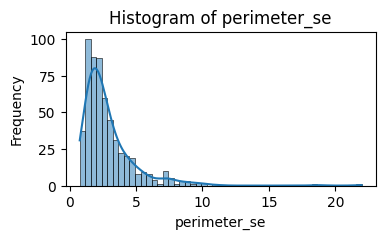

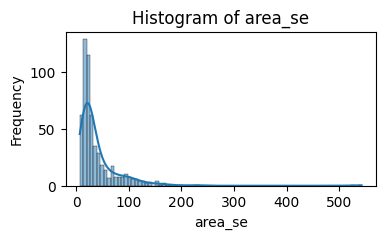

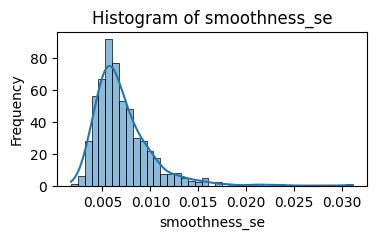

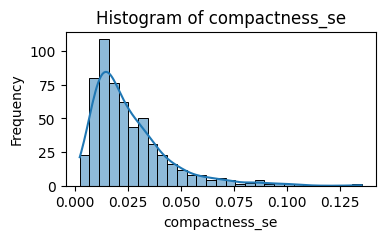

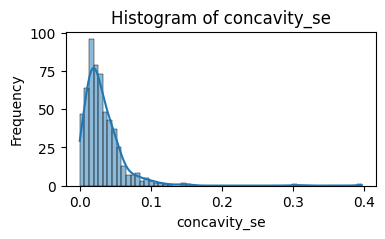

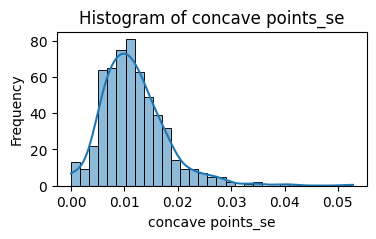

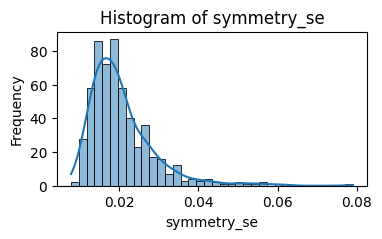

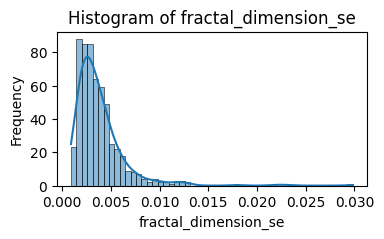

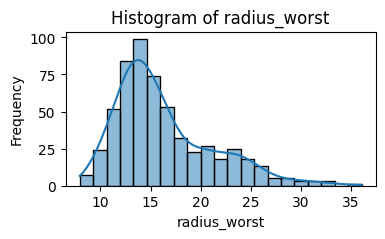

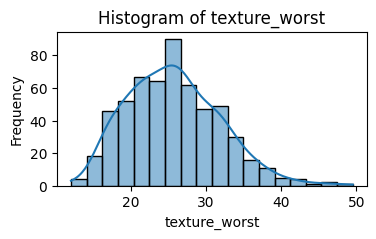

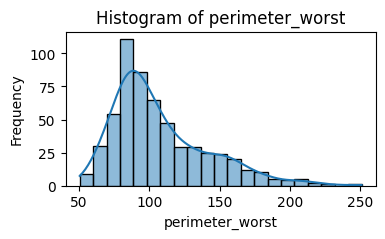

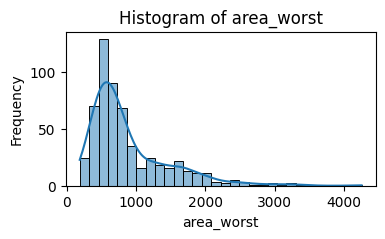

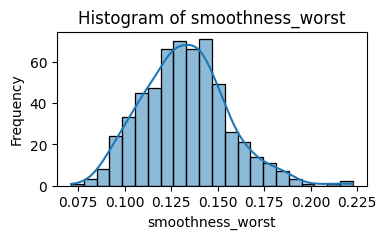

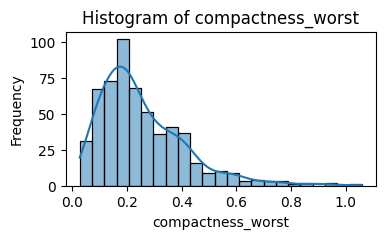

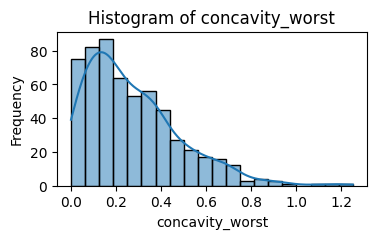

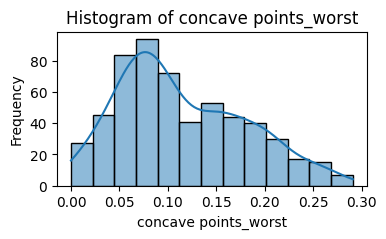

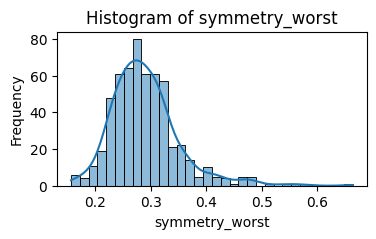

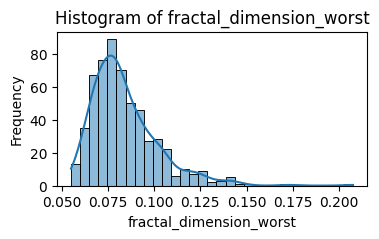

In [27]:
for column in df.columns:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

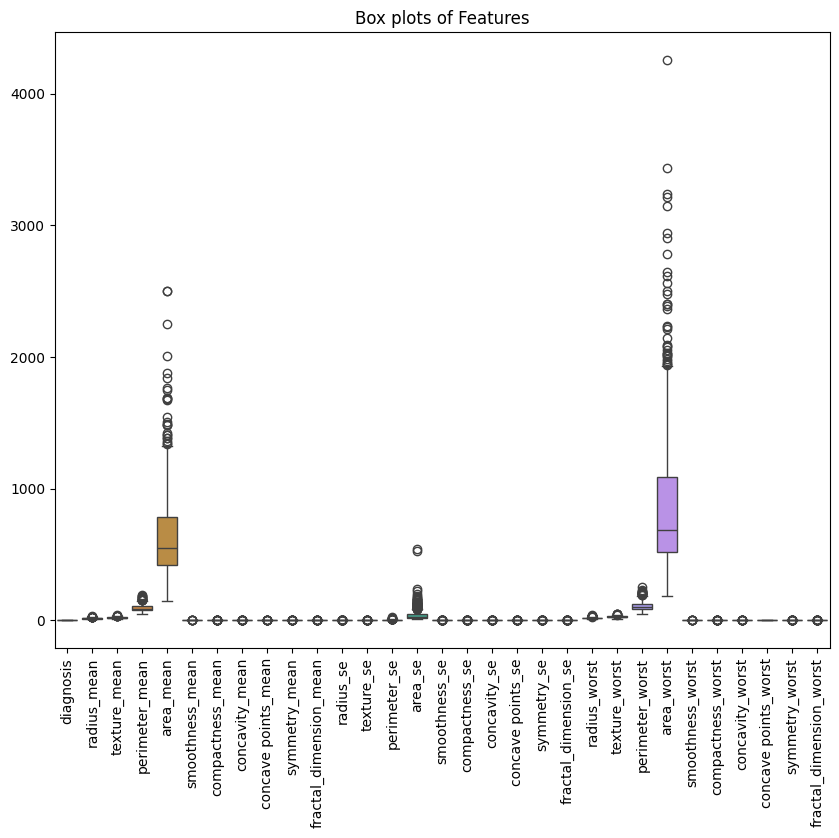

In [28]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.title('Box plots of Features')
plt.xticks(rotation=90)
plt.show()

In [29]:
features = df.select_dtypes(include=['float64']).columns
for column in features:
    df[f'{column}_winsorized'] = winsorize(df[column], limits=[0.05, 0.08])
    df.drop([column], axis=1, inplace=True)

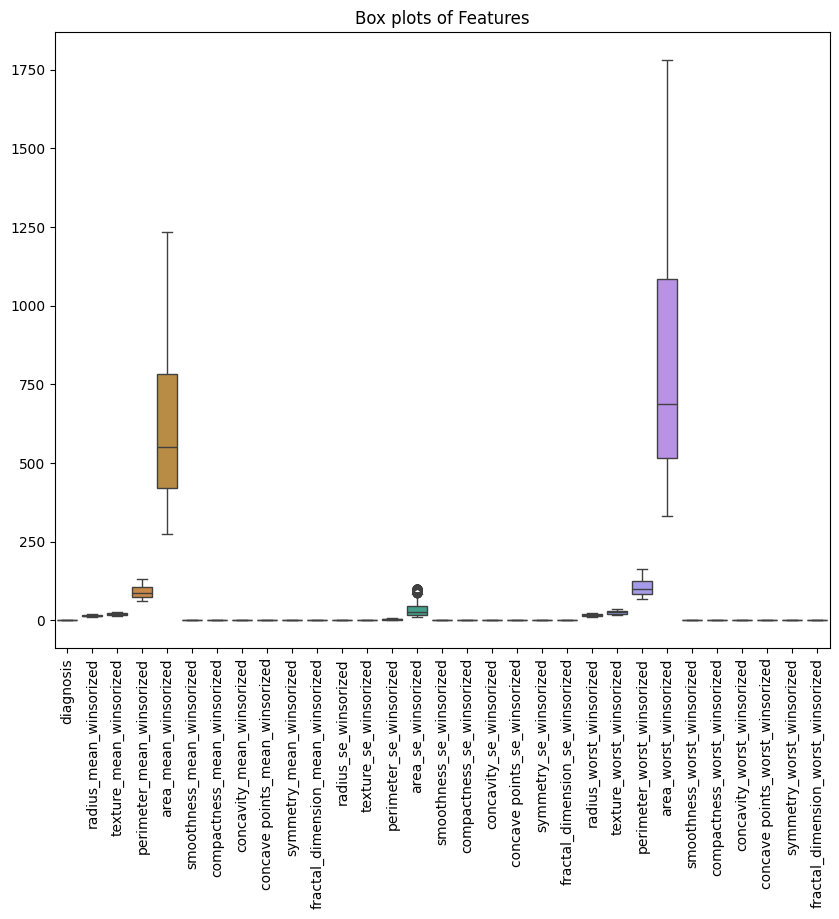

In [30]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.title('Box plots of Features')
plt.xticks(rotation=90)
plt.show()

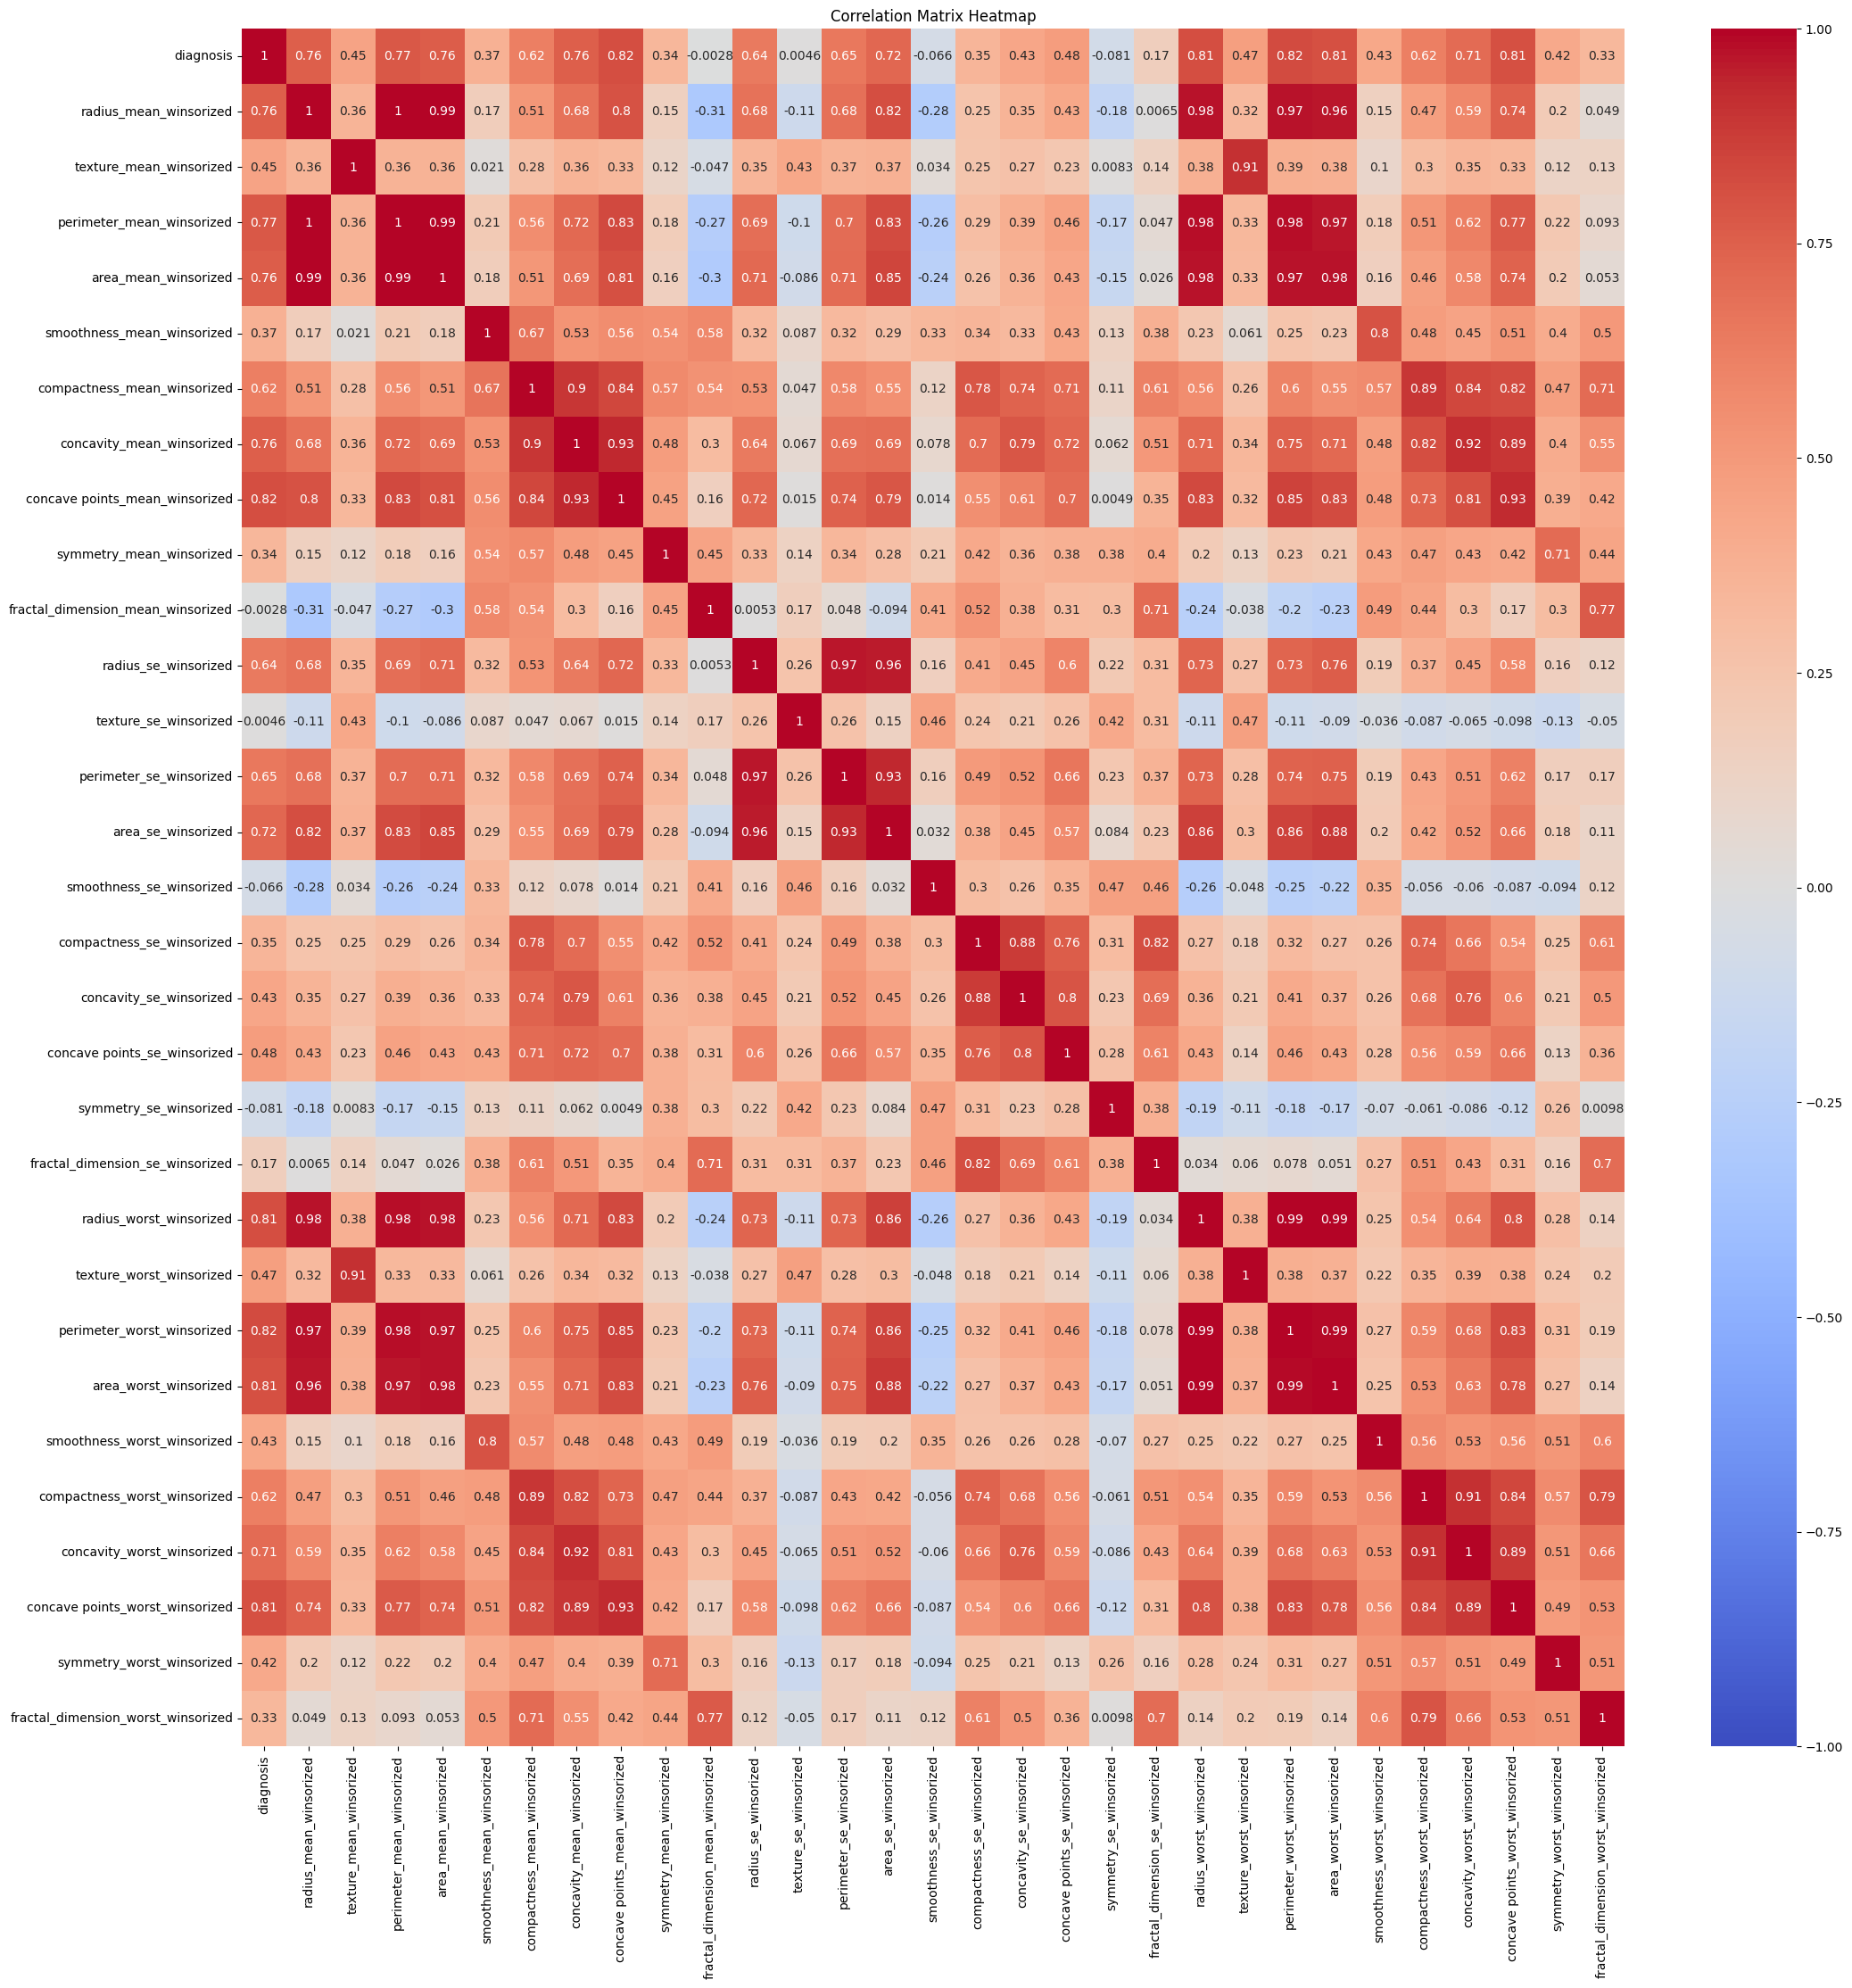

In [33]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64', 'int32'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [59]:
selected_columns = correlation_matrix.columns[correlation_matrix['diagnosis'] > 0.3]
selected_columns

Index(['diagnosis', 'radius_mean_winsorized', 'texture_mean_winsorized',
       'perimeter_mean_winsorized', 'area_mean_winsorized',
       'smoothness_mean_winsorized', 'compactness_mean_winsorized',
       'concavity_mean_winsorized', 'concave points_mean_winsorized',
       'symmetry_mean_winsorized', 'radius_se_winsorized',
       'perimeter_se_winsorized', 'area_se_winsorized',
       'compactness_se_winsorized', 'concavity_se_winsorized',
       'concave points_se_winsorized', 'radius_worst_winsorized',
       'texture_worst_winsorized', 'perimeter_worst_winsorized',
       'area_worst_winsorized', 'smoothness_worst_winsorized',
       'compactness_worst_winsorized', 'concavity_worst_winsorized',
       'concave points_worst_winsorized', 'symmetry_worst_winsorized',
       'fractal_dimension_worst_winsorized'],
      dtype='object')

In [60]:
X = df[selected_columns]
X = X.drop(['diagnosis'], axis=1)

y=df['diagnosis']

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature importances:\n", feature_importances)

Feature importances:
 radius_mean_winsorized                0.038897
texture_mean_winsorized               0.016048
perimeter_mean_winsorized             0.031121
area_mean_winsorized                  0.049751
smoothness_mean_winsorized            0.008498
compactness_mean_winsorized           0.010766
concavity_mean_winsorized             0.062194
concave points_mean_winsorized        0.108971
symmetry_mean_winsorized              0.002615
radius_se_winsorized                  0.008801
perimeter_se_winsorized               0.016531
area_se_winsorized                    0.035419
compactness_se_winsorized             0.004507
concavity_se_winsorized               0.008138
concave points_se_winsorized          0.005074
radius_worst_winsorized               0.090507
texture_worst_winsorized              0.020323
perimeter_worst_winsorized            0.149729
area_worst_winsorized                 0.139693
smoothness_worst_winsorized           0.011428
compactness_worst_winsorized          

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(455, 25) (114, 25) (455,) (114,)


In [63]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
# Define the random forest classifier
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred_2 = model.predict(X_test)

# Assuming y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred_2)
precision = precision_score(y_test, y_pred_2)
recall = recall_score(y_test, y_pred_2)
f1 = f1_score(y_test, y_pred_2)
classification_report_result = classification_report(y_test, y_pred_2)
accuracy = accuracy_score(y_test, y_pred_2)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification report:\n", classification_report_result)

Confusion Matrix:
 [[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1-score: 0.9523809523809524
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

